In [303]:
import numpy as np
import pandas as pd

In [304]:
import matplotlib.pyplot as plt
import sklearn

In [305]:
df=pd.read_csv('Fraud_check.csv')

In [306]:
df.shape

(600, 6)

In [307]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [308]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [309]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [310]:
df['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [311]:
df.dropna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


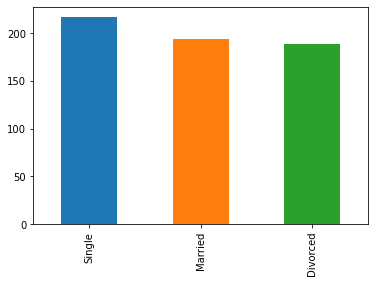

In [312]:
df['Marital.Status'].value_counts().plot(kind='bar')

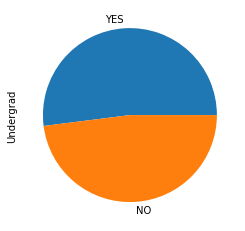

In [313]:
df['Undergrad'].value_counts().plot(kind='pie')

In [316]:
from sklearn.model_selection import train_test_split

In [339]:
df['Status']=['Risky' if x<30000 else 'Good' for x in df['Taxable.Income']]

In [340]:
df['Status'].value_counts()

Good     476
Risky    124
Name: Status, dtype: int64

In [341]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [342]:
y=df['Status']

In [343]:
y.shape

(600,)

In [344]:
np.unique(y)#False-- Good, True-- Risky to fraud

array(['Good', 'Risky'], dtype=object)

In [345]:
x=df.drop('Status',axis=1)

In [346]:
x1=x.drop('Taxable.Income',axis=1)

In [347]:
x1.shape

(600, 5)

In [364]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y,test_size=0.2,random_state=90)

In [365]:
X_train=pd.get_dummies(X_train)#Dummies to convert string values to numercial
X_test=pd.get_dummies(X_test)

In [366]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((480, 9), (120, 9), (480,), (120,))

In [367]:
from sklearn.tree import DecisionTreeClassifier

In [368]:
model=DecisionTreeClassifier()

In [369]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [370]:
model.score(X_test,Y_test)

0.6666666666666666

In [371]:
model.score(X_train,Y_train)

1.0

In [372]:
y_pred=model.predict(X_test)

In [373]:
pd.crosstab(y_pred,Y_test)

Status,Good,Risky
row_0,,
Good,71,19
Risky,21,9


In [374]:
Y_test.count()

120

In [375]:
X_test.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
364,62943,17,0,1,0,1,0,1,0
410,41152,27,1,0,1,0,0,1,0
513,140400,10,1,0,1,0,0,1,0
188,137569,10,1,0,1,0,0,1,0
436,158057,4,1,0,1,0,0,0,1


In [376]:
df.shape

(600, 7)

In [377]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [378]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [379]:
from sklearn.ensemble import RandomForestClassifier

In [380]:
rf=RandomForestClassifier(n_estimators=30,max_depth=2)

In [381]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [382]:
rf.score(X_train,Y_train)

0.8

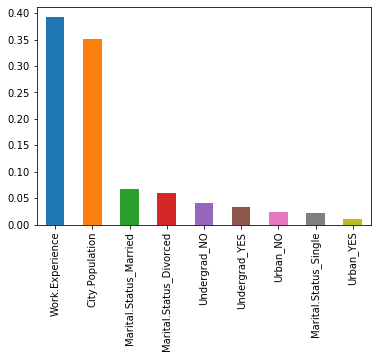

In [383]:
pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False).plot(kind='bar')#to find the important features

In [384]:
rf.score(X_test,Y_test)

0.7666666666666667

In [385]:
rf.max_depth

2